# Optimization Techniques on MNIST Dataset
This notebook explores various optimization techniques for training neural networks on the MNIST dataset. The focus will be on different optimization strategies including Adaptive Learning Rates, SGD, Mini-Batch Gradient Descent, and Learning Rate Adjustments. Each section will provide a practical task related to these techniques.

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time as time

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


## Adaptive Learning Rates

## Implementing a Simple Neural Network from Scratch

### Building the Network
Define the architecture of a simple feedforward neural network with one hidden layer. You will need to manually initialize the weights and biases.

**TODO:** Initialize Parameters
Objective: Create a function to initialize weights and biases for all layers of the network.
Instructions:
- Initialize weights with small random values and biases with zeros.
- Use numpy for creating arrays and operations.

Hint: Use np.random.randn for weights and np.zeros for biases. Scale weights by 0.1.

In [2]:
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize weights and biases for a simple feedforward neural network.

    Parameters:
    - input_size: Number of input features.
    - hidden_size: Number of neurons in the hidden layer.
    - output_size: Number of output classes.

    Returns:
    - parameters: A dictionary containing weights and biases.
    """
    w1 = 0.1 * np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))

    w2 = 0.1 * np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))

    parameters = {"w1": w1,"b1": b1, "w2": w2, "b2": b2}

    return parameters


TODO: Define Activation Functions
Objective: Implement commonly used activation functions.
Instructions:
 - Define the ReLU and Sigmoid activation functions.
 - Ensure each function works with numpy arrays and supports both forward and derivative (gradient) computations.


In [3]:
def relu(x):
    """
    ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying ReLU.
    """
    return np.maximum(0, x)

def relu_derivative(x):
    """
    Derivative of ReLU activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of ReLU.
    """
    return (x > 0).astype(float)

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Output after applying sigmoid.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    Derivative of sigmoid activation function.

    Parameters:
    - x: Input numpy array.

    Returns:
    - Derivative of sigmoid.
    """
    s = sigmoid(x)
    return s * (1 - s)


TODO: Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.

In [4]:
def forward_propagation(X, parameters):
    """
    Perform forward propagation through the network.

    Parameters:
    - X: Input data (shape: number of examples x input size).
    - parameters: Dictionary containing weights and biases.

    Returns:
    - A2: Output of the network (after activation).
    - cache: Dictionary containing intermediate values for backpropagation.
    """
    X = X.reshape(X.shape[0], -1)
    Z1 = np.dot(X, parameters['w1']) + parameters['b1']
    A1 = relu(Z1)


    Z2 = np.dot(A1, parameters['w2']) + parameters['b2']
    A2 = sigmoid(Z2)


    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

    return A2, cache

TODO: Implement the loss function. Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.

In [5]:
def compute_loss(y_true, y_pred):
    """
    Compute the categorical cross-entropy loss.

    Parameters:
    - y_true: True labels (one-hot encoded).
    - y_pred: Predicted probabilities (output of the network).

    Returns:
    - loss: Computed loss.
    """
    clipped_pred = np.clip(y_pred, 1e-12, 1.0)
    loss = -np.mean(np.sum(y_true * np.log(clipped_pred), axis=1))

    return loss


TODO: Implement backpropagation for the network and Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.

In [6]:
def backward_propagation(X, y_true, parameters, cache):
    """
    Perform backward propagation through the network.

    Parameters:
    - X: Input data.
    - y_true: True labels.
    - parameters: Dictionary containing weights and biases.
    - cache: Intermediate values from forward propagation.

    Returns:
    - gradients: Dictionary containing gradients for weights and biases.
    """
    X = X.reshape(X.shape[0], -1)

    dloss = cache['A2'] - y_true


    dw2 = np.dot(cache['A1'].T, dloss) / X.shape[0]
    db2 = np.sum(dloss, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dloss, parameters['w2'].T)
    dZ1 = dA1 * relu_derivative(cache['Z1'])


    dw1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    gradients = {"dw1": dw1, "db1": db1, "dw2": dw2, "db2": db2}

    return gradients

TODO: Update the parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.

In [7]:
def update_parameters(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using gradient descent.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.

    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters:
        parameters[key] -= learning_rate * gradients[f"d{key}"]

    return parameters


TODO: Train the model by changing the hidden layer size (such as [32, 64, 128]) and observe the impact on network performance during training.

    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

In [8]:
# Training Loop
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """


    input_size = X_train.shape[1] * X_train.shape[2]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    losses = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        losses.append(loss)

        grad = backward_propagation(X_train, y_train, parameters, cache)

        param = update_parameters(parameters, grad, learning_rate)

        if (epoch) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch} - Loss: {loss:.4f}")

    return param, losses

    hidden_size = [32, 64, 128]
    for size in hidden_size:
        print(f"\nTraining with hidden layer size: {size}")
        _, loss = train_model(x_train, y_train, size)


In [9]:
# Training with hidden layer size: 32
print("Training with hidden layer size: 32")
parameters_32 = train_model(x_train, y_train, hidden_size=32)

# Training with hidden layer size: 64
print("\nTraining with hidden layer size: 64")
parameters_64 = train_model(x_train, y_train, hidden_size=64)

# Training with hidden layer size: 128
print("\nTraining with hidden layer size: 128")
parameters_128 = train_model(x_train, y_train, hidden_size=128)


Training with hidden layer size: 32
Epoch 0 - Loss: 0.6808
Epoch 10 - Loss: 1.2351
Epoch 20 - Loss: 1.7819
Epoch 30 - Loss: 1.9917
Epoch 40 - Loss: 2.0377

Training with hidden layer size: 64
Epoch 0 - Loss: 0.8916
Epoch 10 - Loss: 1.6052
Epoch 20 - Loss: 1.8839
Epoch 30 - Loss: 1.9212
Epoch 40 - Loss: 1.8805

Training with hidden layer size: 128
Epoch 0 - Loss: 0.9095
Epoch 10 - Loss: 1.8138
Epoch 20 - Loss: 1.8762
Epoch 30 - Loss: 1.7855
Epoch 40 - Loss: 1.6788


TODO: Implement Adam Optimizer

1. Initialize Parameters: Create variables to store the moment estimates (first and second) for each parameter.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).

2. Update Rules: Implement the update rules based on the gradients, learning rate, and moment estimates.


In [10]:
def initialize_adam(parameters):
    """
    Initialize the Adam optimizer variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: First moment vector (initialized to zeros).
    - s: Second moment vector (initialized to zeros).
    - t: Time step (initialized to 0).
    """
    v = {}
    s = {}
    t = 0

    for key in parameters:
        v[key] = np.zeros_like(parameters[key])
        s[key] = np.zeros_like(parameters[key])

    return v, s, t


def update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update parameters using the Adam optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: First moment vector.
    - s: Second moment vector.
    - t: Time step.
    - learning_rate: Learning rate for updates.
    - beta1: Exponential decay rate for the first moment estimates.
    - beta2: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated first moment vector.
    - s: Updated second moment vector.
    - t: Updated time step.
    """
    t += 1
    for key in parameters:
        v[key] = beta1 * v[key] + (1 - beta1) * gradients[f"d{key}"]
        s[key] = beta2 * s[key] + (1 - beta2) * (gradients[f"d{key}"] ** 2)

        v_hat = v[key] / (1 - beta1 ** t)
        s_hat = s[key] / (1 - beta2 ** t)

        parameters[key] -= learning_rate * v_hat / (np.sqrt(s_hat) + epsilon)

    return parameters, v, s, t


TODO: Implement Adam optimizer into the training loop.

In [11]:
def train_model_with_adam(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001):
    """
    Train the neural network model using Adam optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    """
    input_size = X_train.shape[1] * X_train.shape[2]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    v, s, t = initialize_adam(parameters)

    losses = []

    for epoch in range(epochs):
        A3, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A3)
        losses.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters, v, s, t = update_parameters_with_adam(
            parameters, gradients, v, s, t, learning_rate
        )

        if (epoch) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return parameters, losses


In [12]:
# Training with hidden layer size: 32
print("Training with hidden layer size: 32")
parameters_32 = train_model_with_adam(x_train, y_train, hidden_size=32)

# Training with hidden layer size: 64
print("\nTraining with hidden layer size: 64")
parameters_64 = train_model_with_adam(x_train, y_train, hidden_size=64)

# Training with hidden layer size: 128
print("\nTraining with hidden layer size: 128")
parameters_128 = train_model_with_adam(x_train, y_train, hidden_size=128)


Training with hidden layer size: 32
Epoch 0, Loss: 0.8941
Epoch 10, Loss: 1.6132
Epoch 20, Loss: 2.1285
Epoch 30, Loss: 1.6513
Epoch 40, Loss: 1.1970

Training with hidden layer size: 64
Epoch 0, Loss: 0.6900
Epoch 10, Loss: 2.0018
Epoch 20, Loss: 2.0919
Epoch 30, Loss: 1.3547
Epoch 40, Loss: 1.1114

Training with hidden layer size: 128
Epoch 0, Loss: 0.8477
Epoch 10, Loss: 2.3169
Epoch 20, Loss: 1.1521
Epoch 30, Loss: 1.0034
Epoch 40, Loss: 0.8995


### Compare Adam and RMSprop


TODO: First, implement the RMSprop optimizer. The RMSprop optimizer uses a moving average of squared gradients to normalize the gradient, which helps to stabilize the updates.

In [13]:
def initialize_rmsprop(parameters):
    """
    Initialize the RMSprop variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - s: Second moment vector (initialized to zeros).
    """
    s = {}
    for key in parameters:
        s[key] = np.zeros_like(parameters[key])

    return s

def update_parameters_with_rmsprop(parameters, gradients, s, learning_rate=0.001, beta=0.9, epsilon=1e-8):
    """
    Update parameters using the RMSprop optimizer.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - s: Second moment vector.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for the second moment estimates.
    - epsilon: Small constant for numerical stability.

    Returns:
    - parameters: Updated weights and biases.
    - s: Updated second moment vector.
    """
    for key in parameters:
        s[key] = beta * s[key] + (1 - beta) * (gradients[f"d{key}"] ** 2)

        parameters[key] -= learning_rate * gradients[f"d{key}"] / (np.sqrt(s[key]) + epsilon)

    return parameters, s


TODO: Modify the training loop to allow for both optimizers and store the loss history for comparison.

In [14]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.001, optimizer='adam'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('adam' or 'rmsprop').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1] * X_train.shape[2]
    output_size = y_train.shape[1]

    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'adam':
        v, s, t = initialize_adam(parameters)
    elif optimizer == 'rmsprop':
        s = initialize_rmsprop(parameters)

    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'adam':
            parameters, v, s, t = update_parameters_with_adam(parameters, gradients, v, s, t, learning_rate)

        elif optimizer == 'rmsprop':
            parameters, s = update_parameters_with_rmsprop(parameters, gradients, s, learning_rate)

        if (epoch) % 10 == 0 or epoch == 0:
            print(f"Epoch {epoch}/{epochs} - Loss: {loss:.4f}")

    return parameters, loss_history

TODO:  Compare Both Optimizers. Create a function to train the model using both optimizers and plot the loss histories for comparison.


Training with adam optimizer:
Epoch 0/50 - Loss: 0.7011
Epoch 10/50 - Loss: 1.1706
Epoch 20/50 - Loss: 1.7457
Epoch 30/50 - Loss: 1.8989
Epoch 40/50 - Loss: 1.6965

Training with rmsprop optimizer:
Epoch 0/50 - Loss: 0.6091
Epoch 10/50 - Loss: 1.4844
Epoch 20/50 - Loss: 1.5965
Epoch 30/50 - Loss: 1.4224
Epoch 40/50 - Loss: 1.2272


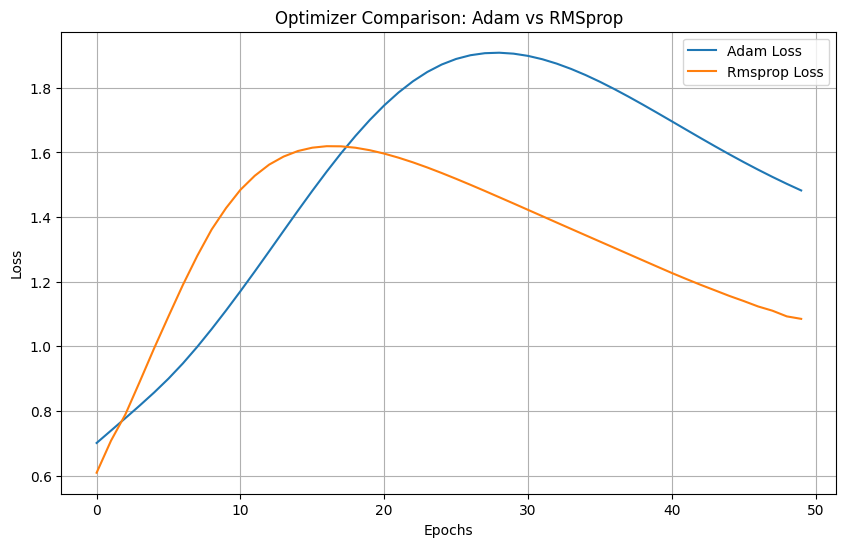

In [15]:
def compare_optimizers(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the Adam and RMSprop optimizers.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    optimizers = ['adam', 'rmsprop']
    results = {}

    for optimizer in optimizers:
        print(f"\nTraining with {optimizer} optimizer:")
        parameters, loss_history = train_model(X_train, y_train, hidden_size=hidden_size, epochs=epochs, optimizer=optimizer)
        results[optimizer] = loss_history

    plt.figure(figsize=(10, 6))
    for optimizer, loss_history in results.items():
        plt.plot(range(epochs), loss_history, label=f"{optimizer.capitalize()} Loss")

    plt.title("Optimizer Comparison: Adam vs RMSprop")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

result = compare_optimizers(x_train, y_train, 32, epochs=50)

## Stochastic Gradient Descent (SGD)

### Impact of Different Learning Rates on SGD


Explore the impact of different learning rates on the training dynamics and performance of Stochastic Gradient Descent (SGD). This will allow us to observe how the learning rate affects convergence speed, stability, and final performance.

Steps for Implementing the Experiment

1. Define the SGD Optimizer: Implement a simple SGD optimizer.
2. Modify the Training Loop: Allow for different learning rates.
3. Train the Model: Run the training process with a set of predefined learning rates.
4. Visualize the Results: Plot the loss curves for each learning rate to compare their effects

1. Implement SGD Optimizer


In [16]:
def update_parameters_with_sgd(parameters, gradients, learning_rate=0.01):
    """
    Update parameters using Stochastic Gradient Descent (SGD).

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - learning_rate: Learning rate for updates.


    Returns:
    - parameters: Updated weights and biases.
    """
    for key in parameters:
        parameters[key] -= learning_rate * gradients[f"d{key}"]

    return parameters


2. Modify the Training Loop


In [27]:
def train_model_with_sgd(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using SGD optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1] * X_train.shape[2]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)
    loss_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return loss_history

3. Experiment with Different Learning Rates



Training with learning rate: 0.001
Epoch 0, Loss: 0.7118
Epoch 10, Loss: 0.7531
Epoch 20, Loss: 0.7918
Epoch 30, Loss: 0.8302
Epoch 40, Loss: 0.8699
Epoch 49, Loss: 0.9077

Training with learning rate: 0.01
Epoch 0, Loss: 0.7397
Epoch 10, Loss: 1.3619
Epoch 20, Loss: 1.8283
Epoch 30, Loss: 1.9824
Epoch 40, Loss: 2.0012
Epoch 49, Loss: 1.9776

Training with learning rate: 0.1
Epoch 0, Loss: 0.7603
Epoch 10, Loss: 1.8645
Epoch 20, Loss: 1.4721
Epoch 30, Loss: 1.2302
Epoch 40, Loss: 1.0960
Epoch 49, Loss: 0.9845


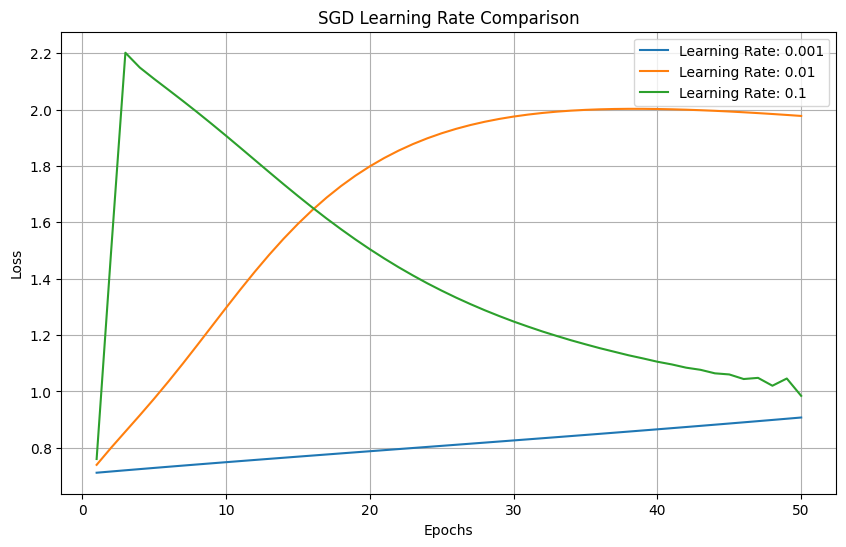

In [29]:
def compare_learning_rates(X_train, y_train, hidden_size, epochs=50, learning_rates=[0.001, 0.01, 0.1]):
    """
    Compare the performance of SGD with different learning rates.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rates: List of learning rates to test.
    """
    results = {}

    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}")
        loss_history = train_model_with_sgd(X_train, y_train, hidden_size, epochs=epochs, learning_rate=lr)
        results[lr] = loss_history

    return results

def plot_learning_rate_comparison(results, epochs):
    """
    Plot the loss curves for different learning rates.

    Parameters:
    - results: Dictionary with learning rates as keys and loss histories as values.
    - epochs: Number of training epochs.
    """
    plt.figure(figsize=(10, 6))

    for lr, loss_history in results.items():
        plt.plot(range(1, epochs + 1), loss_history, label=f"Learning Rate: {lr}")

    plt.title("SGD Learning Rate Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

hidden_size = 32
learning_rates = [0.001, 0.01, 0.1]

results = compare_learning_rates(x_train, y_train, hidden_size, epochs=50, learning_rates=learning_rates)
plot_learning_rate_comparison(results, epochs=50)


### SGD with Momentum vs. Classic SGD


TODO: Compare Stochastic Gradient Descent (SGD) with momentum and classic SGD, you can set up an experiment that trains the same model using both methods. This will help you observe differences in convergence speed and stability.

Steps for Implementing the Comparison:

1. Implement Classic SGD: Ensure you have a basic SGD implementation.(already implemented in the previous cells)

2. Implement SGD with Momentum: Add a momentum version of the SGD optimizer.

3. Modify the Training Loop: Allow for both optimizers in the training process.

4. Train the Model: Run the training process using both optimizers.

5. Visualize the Results: Plot the loss curves for each optimizer to compare their performance.

2. Implement SGD with Momentum


In [30]:
def initialize_momentum(parameters):
    """
    Initialize the momentum variables.

    Parameters:
    - parameters: Dictionary containing weights and biases.

    Returns:
    - v: Momentum variable (initialized to zeros).
    """
    v = {}
    for key in parameters:
        v[key] = np.zeros_like(parameters[key])
    return v

def update_parameters_with_momentum(parameters, gradients, v, learning_rate=0.01, beta=0.9):
    """
    Update parameters using SGD with momentum.

    Parameters:
    - parameters: Current weights and biases.
    - gradients: Calculated gradients.
    - v: Momentum variable.
    - learning_rate: Learning rate for updates.
    - beta: Exponential decay rate for momentum.

    Returns:
    - parameters: Updated weights and biases.
    - v: Updated momentum variable.
    """
    for key in parameters:
        v[key] = beta * v[key] + (1 - beta) * gradients[f"d{key}"]
        parameters[key] -= learning_rate * v[key]
    return parameters, v


3. Modify the Training Loop


In [32]:
def train_model(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, optimizer='sgd'):
    """
    Train the neural network model using specified optimizer.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - optimizer: The optimizer to use ('sgd' or 'momentum').

    Returns:
    - loss_history: List of loss values over epochs.
    """
    input_size = X_train.shape[1] * X_train.shape[2]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    if optimizer == 'momentum':
        v = initialize_momentum(parameters)

    loss_history = []
    for epoch in range(epochs):
        A3, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A3)
        loss_history.append(loss)

        gradients = backward_propagation(X_train, y_train, parameters, cache)

        if optimizer == 'momentum':
            parameters, v = update_parameters_with_momentum(parameters, gradients, v, learning_rate)
        elif optimizer == 'sgd':
            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss({optimizer.capitalize()}): {loss:.4f}")

    return loss_history

4. Train the Model with Both Optimizers



Training with Classic SGD:
Epoch 0, Loss(Sgd): 0.8150
Epoch 10, Loss(Sgd): 1.3545
Epoch 20, Loss(Sgd): 1.8238
Epoch 30, Loss(Sgd): 1.9883
Epoch 40, Loss(Sgd): 2.0136
Epoch 49, Loss(Sgd): 1.9936

Training with SGD with Momentum:
Epoch 0, Loss(Momentum): 0.6431
Epoch 10, Loss(Momentum): 0.9683
Epoch 20, Loss(Momentum): 1.6848
Epoch 30, Loss(Momentum): 2.3226
Epoch 40, Loss(Momentum): 2.4100
Epoch 49, Loss(Momentum): 2.2113


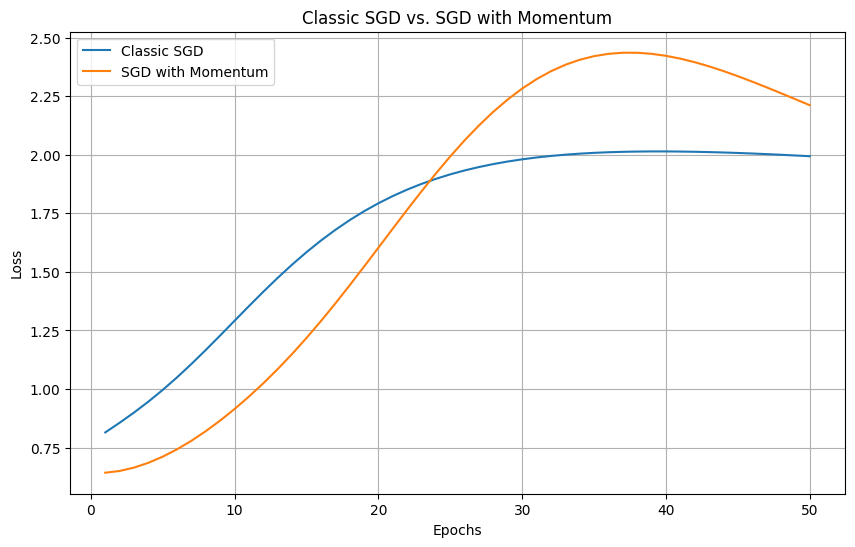

In [33]:
def compare_sgd_and_momentum(X_train, y_train, hidden_size, epochs=50):
    """
    Compare the performance of classic SGD and SGD with momentum.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    """
    results = {}

    print("\nTraining with Classic SGD:")
    loss_sgd = train_model(X_train, y_train, hidden_size, epochs=epochs, learning_rate=learning_rate, optimizer='sgd')
    results["Classic SGD"] = loss_sgd

    print("\nTraining with SGD with Momentum:")
    loss_momentum = train_model(X_train, y_train, hidden_size, epochs=epochs, learning_rate=learning_rate, optimizer='momentum')
    results["SGD with Momentum"] = loss_momentum

    return results

def plot_sgd_and_momentum_comparison(results, epochs):
    """
    Plot the loss curves for classic SGD and SGD with momentum.

    Parameters:
    - results: Dictionary containing loss histories for both optimizers.
    - epochs: Number of training epochs.
    """
    plt.figure(figsize=(10, 6))
    for optimizer, loss_history in results.items():
        plt.plot(range(1, epochs + 1), loss_history, label=optimizer)

    plt.title("Classic SGD vs. SGD with Momentum")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

hidden_size = 32
epochs = 50
learning_rate = 0.01

results = compare_sgd_and_momentum(x_train, y_train, hidden_size, epochs=epochs)

plot_sgd_and_momentum_comparison(results, epochs)


## Mini-Batch Gradient Descent

### Mini-Batch Size Optimization

TODO: Investigate how different mini-batch sizes affect model performance, you can set up an experiment where you train the same model using various mini-batch sizes.

Steps for Implementing the Mini-Batch Size Experiment

1. Modify the Training Loop: Update the training loop to use mini-batches.
2. Train the Model: Run the training process with a set of predefined mini-batch sizes.
3. Evaluate Performance: Track training time and accuracy for each mini-batch size.
4. Print the training losses and accuracies for comparison.

1. Modify the Training Loop for Mini-Batches


In [35]:
def train_model_with_mini_batches(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01, batch_size=32):
    """
    Train the neural network model using mini-batches.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.
    - batch_size: Size of mini-batches.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1] * X_train.shape[2]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    indices = np.arange(X_train.shape[0])
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        np.random.shuffle(indices)
        X_train = X_train[indices]
        y_train = y_train[indices]

        epoch_loss = 0
        correct_predictions = 0

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]

            A3, cache = forward_propagation(X_batch, parameters)

            batch_loss = compute_loss(y_batch, A3)
            epoch_loss += batch_loss * X_batch.shape[0]

            gradients = backward_propagation(X_batch, y_batch, parameters, cache)

            parameters = update_parameters_with_sgd(parameters, gradients, learning_rate)

            batch_predictions = np.argmax(A3, axis=1)
            batch_labels = np.argmax(y_batch, axis=1)
            correct_predictions += np.sum(batch_predictions == batch_labels)

        epoch_loss /= X_train.shape[0]
        loss_history.append(epoch_loss)

        epoch_accuracy = correct_predictions / X_train.shape[0]
        accuracy_history.append(epoch_accuracy)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

    return loss_history, accuracy_history


2. Train the Model with Different Mini-Batch Sizes


In [36]:
def compare_mini_batch_sizes(X_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64]):
    """
    Compare the performance of different mini-batch sizes and print results.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_sizes: List of mini-batch sizes to test.
    """
    results = {}

    for batch_size in batch_sizes:
        print(f"\nTraining with batch size: {batch_size}")
        loss_history, accuracy_history = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, learning_rate, batch_size)
        results[batch_size] = {"loss_history": loss_history, "accuracy_history": accuracy_history}

    return results

results = compare_mini_batch_sizes(x_train, y_train, hidden_size, epochs=50, batch_sizes=[16, 32, 64])


Training with batch size: 16
Epoch 0 - Loss: 0.7929, Accuracy: 0.7217
Epoch 10 - Loss: 0.3785, Accuracy: 0.8725
Epoch 20 - Loss: 0.3364, Accuracy: 0.8855
Epoch 30 - Loss: 0.3137, Accuracy: 0.8937
Epoch 40 - Loss: 0.2966, Accuracy: 0.8991
Epoch 49 - Loss: 0.2865, Accuracy: 0.9029

Training with batch size: 32
Epoch 0 - Loss: 0.9229, Accuracy: 0.6843
Epoch 10 - Loss: 0.4248, Accuracy: 0.8592
Epoch 20 - Loss: 0.3774, Accuracy: 0.8743
Epoch 30 - Loss: 0.3521, Accuracy: 0.8820
Epoch 40 - Loss: 0.3332, Accuracy: 0.8880
Epoch 49 - Loss: 0.3204, Accuracy: 0.8926

Training with batch size: 64
Epoch 0 - Loss: 1.1418, Accuracy: 0.6013
Epoch 10 - Loss: 0.4879, Accuracy: 0.8417
Epoch 20 - Loss: 0.4334, Accuracy: 0.8579
Epoch 30 - Loss: 0.4020, Accuracy: 0.8681
Epoch 40 - Loss: 0.3807, Accuracy: 0.8748
Epoch 49 - Loss: 0.3661, Accuracy: 0.8796


### Mini-Batch vs. Full-Batch Gradient Descent


TODO: Compare the efficiency and performance of mini-batch gradient descent against full-batch gradient descent.

1. Implement Full-Batch Gradient Descent: Ensure you have a full-batch gradient descent implementation.

2. Modify the Training Loop: Allow the training loop to handle both mini-batch and full-batch scenarios.

3. Train the Model: Run the training process using both methods and track their performance.

4. Print Results: Display the final loss and accuracy for both methods along with training times.

In [24]:
def train_model_full_batch(X_train, y_train, hidden_size, epochs=50, learning_rate=0.01):
    """
    Train the neural network model using full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - learning_rate: Learning rate for optimization.

    Returns:
    - loss_history: List of loss values over epochs.
    - accuracy_history: List of accuracy values over epochs.
    """
    input_size = X_train.shape[1] * X_train.shape[2]
    output_size = y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        A2, cache = forward_propagation(X_train, parameters)

        loss = compute_loss(y_train, A2)
        loss_history.append(loss)

        gradient = backward_propagation(X_train, y_train, parameters, cache)

        param = update_parameters_with_sgd(parameters, gradient, learning_rate)

        pred = np.argmax(A2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = np.mean(pred == labels)
        accuracy_history.append(accuracy)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Full-Batch - Epoch {epoch} Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    return loss_history, accuracy_history


In [25]:


def compare_mini_batch_and_full_batch(X_train, y_train, hidden_size, epochs=50, batch_size=32):
    """
    Compare the performance of mini-batch gradient descent against full-batch gradient descent.

    Parameters:
    - X_train: Training data.
    - y_train: One-hot encoded labels.
    - hidden_size: Number of neurons in the hidden layer.
    - epochs: Number of training epochs.
    - batch_size: Size of mini-batches for mini-batch gradient descent.
    """
    results = {}

    # Train with Full-Batch Gradient Descent
    print("\nTraining with Full-Batch Gradient Descent:")
    start_time = time.time()
    loss_full_batch, acc_full_batch = train_model_full_batch(X_train, y_train, hidden_size, epochs, learning_rate)
    full_batch_time = time.time() - start_time
    results["Full-Batch"] = {
        "loss_history": loss_full_batch,
        "accuracy_history": acc_full_batch,
        "time": full_batch_time
    }

    # Train with Mini-Batch Gradient Descent
    print("\nTraining with Mini-Batch Gradient Descent:")
    start_time = time.time()
    loss_mini_batch, acc_mini_batch = train_model_with_mini_batches(X_train, y_train, hidden_size, epochs, learning_rate, batch_size)
    mini_batch_time = time.time() - start_time
    results["Mini-Batch"] = {
        "loss_history": loss_mini_batch,
        "accuracy_history": acc_mini_batch,
        "time": mini_batch_time
    }

    # Print final results
    print("\nFinal Results:")
    for method, metrics in results.items():
        print(f"{method} - Final Loss: {metrics['loss_history'][-1]:.4f}, Final Accuracy: {metrics['accuracy_history'][-1]:.4f}, Training Time: {metrics['time']:.2f}s")

    return results

results = compare_mini_batch_and_full_batch(x_train, y_train, hidden_size, epochs=50, batch_size=32)
